In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def f(x):
    return x**2+1
def g(x):
    return (6*x/(2+2*x))**2 + 1 + x*(6*x/(2+2*x)-2)*(6*x/(2+2*x)-4)

$$ \min x^2 +1 $$

$$ subject\; to\; (x-2)(x-4) \leq 0$$

### Lagrangian:
$$ L(x,\lambda) = x^2+1+\lambda(x-2)(x-4)$$ 

$$\nabla L_x = 0$$

$$ x = \frac{6\lambda}{2+2\lambda}$$

$$g(\lambda) = (\frac{6\lambda}{2+2\lambda})^2 +1 + \lambda(\frac{6\lambda}{2+2\lambda} -2)(\frac{6\lambda}{2+2\lambda}-4) $$



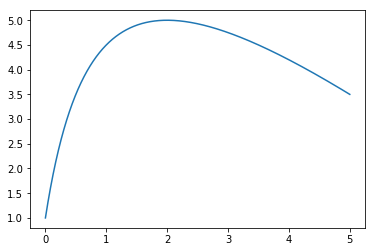

In [3]:
x = np.linspace(0,5,10000)
plt.plot(x,g(x))
plt.show()

In [4]:
import cvxpy as cvx

In [5]:
x = cvx.Variable()
constraints = [
                -x<=-2,
                 x<= 4  
              ]
obj = cvx.Minimize(f(x))
prob = cvx.Problem(obj, constraints)
prob.solve()

5.000000000000002

In [6]:
x = sp.Symbol('x')

g_symb = [(6*x/(2+2*x))**2 + 1 + x*(6*x/(2+2*x)-2)*(6*x/(2+2*x)-4)]
g = sp.lambdify([x], g_symb, 'numpy')

derivative = sp.derive_by_array(g_symb, x)
g_div = sp.lambdify([x], derivative, 'numpy')

In [7]:
sp.solvers.solve(derivative)

[{x: -4}, {x: 2}]

In [8]:
g(2)

[5.0]

$$\lambda^* = 2$$

$$g^* = 5$$

$$f^* = 5$$

## Problem 2:

$$ min \; p^tx$$

$$ subject\; to\qquad 0\leq x \leq 1$$

$$\qquad \qquad \; 1^tx = b $$

### Lagragian:

$$ L(x,\lambda,\nu) = p^tx - \lambda^t(x-1)-\lambda^t_2(x) - \nu(1^tx - b)$$

$$ L(x,\lambda,\nu) = (p^t-\lambda^t-\lambda^t_2-\nu 1^t)x + b \nu + \lambda^t1 $$

### Dual Objective:

$$ G(\lambda,\nu) = b \nu + \lambda^t1 $$
$$subject\; to \qquad p-\lambda-\lambda_2-\nu = 0 $$
$$ \qquad \qquad \lambda \geq 0$$

$$ G(\lambda,\nu) = b \nu + \lambda^t1 $$
$$subject\; to \qquad \lambda +\nu \leq p $$
$$ \qquad \qquad \lambda \geq 0$$


In [9]:
from scipy.optimize import linprog
res = linprog([1], A_eq=[[1]], b_eq =[1],bounds = [(0,1)], options={"disp": True})

Optimization terminated successfully.
         Current function value: 1.000000    
         Iterations: 1


In [10]:
res2 = linprog([-1,-1], A_ub=[[1,1]], b_ub = [1], options={"disp": True})

Optimization terminated successfully.
         Current function value: -1.000000   
         Iterations: 1


We test out this equation in linprog with an example in which we have:
$b = 1$
$ p =1$
Since we are mnimizing $-G(\lambda,\nu)$ we can say that $ max\; G(\lambda, \nu) = 1$ thus, we have strong duality in this case since f* - g* = 0

## Problem 3

$$ minimize \; x^tx $$

$$ subject\;to \qquad Ax = b $$

$$ \qquad \lambda \geq 0 $$

### Lagrangian

$$ L(x,\lambda) = x^tx - \lambda^t(Ax - b) $$

$$ \nabla L_x  = 2x - A^t\lambda = $$

$$  x = \frac{A^t\lambda}{2}$$

### Dual Problem

$$ g(x,\lambda) = \frac{(A^t\lambda)^t(A^t\lambda)}{4}-\lambda^t(\frac{AA^t\lambda}{2}-b) $$

$$ g(x,\lambda) = -\frac{\lambda^tAA^t\lambda}{4}+\lambda^tb $$

$$ \lambda \gt 0 $$

## Problem 4:

$$ \min t$$
$$ subject\; to\; \begin{bmatrix} A & -1 \end{bmatrix} \begin{bmatrix}x \\ t\end{bmatrix}\leq b$$

### Lagrangian:

$$L(x,\lambda,\nu) = t + \lambda^t(Ax -1t -b) $$

$$L(x,\lambda,\nu) = (1 - \lambda^t1)t +  \lambda^tAx  - \lambda^tb $$

$$ \nabla L_x = 0$$

$$ \frac{d}{dx}\lambda^tAx =A^t\lambda = 0 $$

$$ \frac{d}{dt}(t - \lambda^t1t) =  1 - 1^t\lambda = 0 $$

$$1^t\lambda = 1 $$

$$\lambda \geq 0 $$

### Dual Objective:
$$ \max -b^t\lambda$$

$$ subject\;to\; A^t\lambda =0$$
$$\qquad \qquad 1^t\lambda =1$$
$$\qquad \qquad \lambda \geq 0$$

### KKT Conditions
$$ L(x_1,x_2,x_3,\lambda) = -b^t\lambda - x_1^t(A^t\lambda) -x_2^t(1^t\lambda -1) -x_3^t(\lambda)$$

$$ \nabla L_\lambda = -b - Ax_1 - 1 x_2 - 1x_3 = 0$$

$$A^t\lambda = 0 $$ 
$$1^t\lambda  = 1$$
$$ \lambda \geq 0$$

$$ \lambda_i x_i = 0 $$

$$x_1 \geq 0$$
$$x_2 \geq 0$$
$$x_3 \geq 0 $$